In [1]:
import yt
import numpy as np
import argparse
import pandas as pd
import matplotlib.pyplot as plt
import re

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Read data from mesa data: 
a = pd.read_excel("/Users/sailor/Desktop/asro_work/git_fun/xinlong_file/initial-model_prepare/ONe6040_update.xlsx")

# read data from Maestro data:
ds = yt.load("ECSN_full/plt0000002/")
name = ds.fullpath.split('/')[-1]

# read data form initial model
f = open("/Users/sailor/Desktop/asro_work/git_fun/xinlong_file/initial-model_prepare/ECSN-ONe6040-final.hse.20480","r")
data = f.readlines()  # data is a list. each element is a line of "23Ne...dat"
f.close()
del data[0:16]

data2d = []
for i in range(len(data)):
    data2d.append(re.split(r"[ ]",data[i].strip('\n')))

for i in range(len(data2d)):
        while '' in data2d[i]:
            data2d[i].remove('')

for i in range(len(data2d)-1,-1,-1):
    if len(data2d[i]) == 3:
        aaaaa = data2d[i].copy()
        data2d.pop(i)
        i+=1
    else:
        data2d[i].extend(aaaaa)

data3d = np.array(data2d).astype(np.float)

df = pd.DataFrame(data3d)
df.columns = ['radius','density','temperature','pressure','ne20','o16','o20','mg24','f29','he4','al27','si28','s32','p31','h1']
df.head()

yt : [INFO     ] 2019-05-01 22:06:12,150 Parameters: current_time              = 0.00020636587839206343
yt : [INFO     ] 2019-05-01 22:06:12,151 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-05-01 22:06:12,152 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-01 22:06:12,153 Parameters: domain_right_edge         = [4.e+08 4.e+08 4.e+08]


,radius,density,temperature,pressure,ne20,o16,o20,mg24,f29,he4,al27,si28,s32,p31,h1
0,4882.8125,8.348568e+09,6.565856e+08,7.367389e+27,0.007297,0.599995,0.392705,4.964888e-16,2.021104e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
1,14648.4375,8.348566e+09,6.565866e+08,7.367387e+27,0.007297,0.599995,0.392705,4.965242e-16,2.021143e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
2,24414.0625,8.348562e+09,6.565888e+08,7.367384e+27,0.007297,0.599995,0.392705,4.965935e-16,2.021225e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
3,34179.6875,8.348556e+09,6.565920e+08,7.367378e+27,0.007298,0.599995,0.392704,4.966975e-16,2.021347e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
4,43945.3125,8.348548e+09,6.565963e+08,7.367371e+27,0.007299,0.599995,0.392703,4.968362e-16,2.021509e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20


In [3]:
# Create a sphere of radius 1500 km in the center of the box.
my_sphere = ds.sphere("c", (2000.0, "km"))

plot = yt.ProfilePlot(my_sphere, "radius", "Hnuc", weight_field="cell_volume")
plot.set_log('radius', False)
plot.set_xlim(0, 2.0e8)
profile = plot.profiles[0]

to_save = pd.DataFrame(columns = ['radius'], data = profile.x)
to_save['Hnuc'] = profile['Hnuc']

xxl = ["tfromp","p0","rho","X(h1)","X(he4)","X(o16)","X(o20)","X(f20)","X(ne20)","X(mg24)","X(al27)","X(si28)","X(p31)","X(s32)"]
for xx in xxl:
    print("dealing with"+xx)
    plot = yt.ProfilePlot(my_sphere, "radius", xx, weight_field="cell_volume")
    plot.set_log('radius', False)
    plot.set_xlim(0, 2.0e8)
    profile = plot.profiles[0]
    to_save[xx] = profile[xx]

to_save.head()


/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


,radius,Hnuc,tfromp,p0,rho,X(h1),X(he4),X(o16),X(o20),X(f20),X(ne20),X(mg24),X(al27),X(si28),X(p31),X(s32)
0,1562500.0,-2.841907e+07,6.865365e+08,7.314148e+27,8.291049e+09,4.571166e-20,9.904586e-23,0.599988,0.386622,3.519998e-09,0.013382,4.145182e-15,1.000001e-20,7.308992e-06,1.118907e-18,1.000034e-20
1,4687500.0,-1.500405e+08,7.958167e+08,7.118205e+27,8.023743e+09,8.454395e-18,4.868837e-21,0.599719,0.330883,1.729261e-08,0.069220,4.508708e-12,1.000018e-20,1.774343e-04,2.617911e-16,1.039512e-20
2,7812500.0,-3.364722e+08,8.224047e+08,6.779708e+27,7.410776e+09,3.806003e-16,7.609711e-20,0.598793,0.122285,4.977039e-08,0.278145,3.338969e-10,1.000099e-20,7.775728e-04,1.179830e-14,3.518871e-19
3,10937500.0,-1.612812e+07,3.875380e+08,6.337062e+27,6.894002e+09,1.000331e-20,3.981877e-21,0.600000,0.003738,2.710834e-09,0.396262,9.530107e-18,1.000000e-20,1.473317e-11,1.005638e-20,1.000000e-20
4,14062500.0,0.000000e+00,3.464059e+08,5.813154e+27,6.459124e+09,9.999999e-21,7.601753e-21,0.600000,0.000027,3.369994e-11,0.399973,2.331788e-20,1.000000e-20,5.502760e-16,1.000000e-20,1.000000e-20


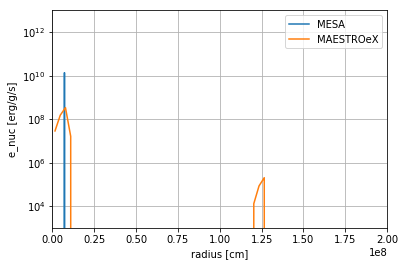

In [15]:
r_sun = 6.955e10  # cm
radius = np.array(a["radius"])
eps_nuc2 = a['eps_nuc_mc2']
eps_nuc_neu = a['eps_nuc_neu']
e_nuc = eps_nuc2-eps_nuc_neu
#e_nuc = eps_nuc_neu

plt.semilogy(radius*r_sun,e_nuc, label = 'MESA')
plt.semilogy(to_save['radius'], -to_save['Hnuc'], label = 'MAESTROeX')
plt.xlabel("radius [cm]")
plt.ylabel("e_nuc [erg/g/s]")
plt.ylim(1e3,1e13)
plt.xlim(0,2.0e8)
plt.grid()
plt.legend()
plt.savefig(name+"_enuc.png")

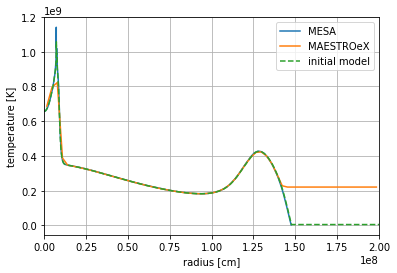

In [8]:
temp = np.array(a["temperature"])

plt.plot(radius*r_sun, temp, label = 'MESA')
plt.plot(to_save['radius'], to_save['tfromp'], label = 'MAESTROeX')
plt.plot(df['radius'],df['temperature'],'--', label = 'initial model')
plt.xlabel("radius [cm]")
plt.ylabel("temperature [K]")
#plt.ylim(1e6,1e13)
plt.xlim(0,2.0e8)
plt.grid()
plt.legend()
plt.savefig(name+"_temperature.png")

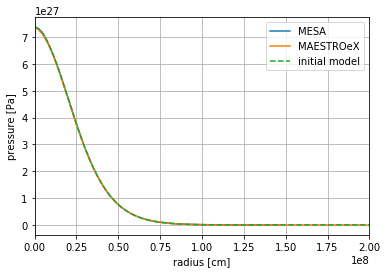

In [9]:
press = np.array(a["pressure"])

plt.plot(radius*r_sun, press, label = 'MESA')
plt.plot(to_save['radius'], to_save['p0'], label = 'MAESTROeX')
plt.plot(df['radius'],df['pressure'],'--', label = 'initial model')
plt.xlabel("radius [cm]")
plt.ylabel("pressure [Pa]")
#plt.ylim(1e6,1e13)
plt.xlim(0,2.0e8)
plt.grid()
plt.legend()
plt.savefig(name+"_pressure.png")

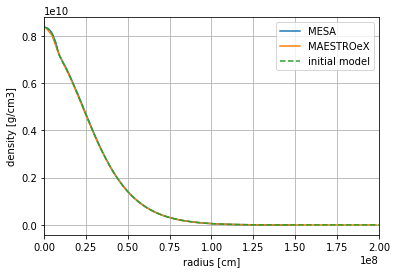

In [10]:
rho = np.power(10,np.array(a["logRho"]))

plt.plot(radius*r_sun, rho, label = 'MESA')
plt.plot(to_save['radius'], to_save['rho'], label = 'MAESTROeX')
plt.plot(df['radius'],df['density'],'--', label = 'initial model')
plt.xlabel("radius [cm]")
plt.ylabel("density [g/cm3]")
#plt.ylim(1e6,1e13)
plt.xlim(0,2.0e8)
plt.grid()
plt.legend()
plt.savefig(name+"_density.png")

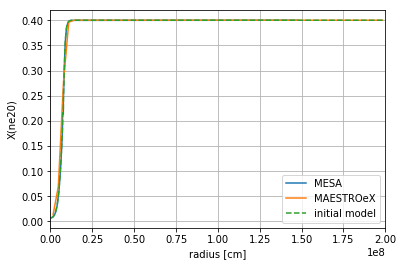

In [11]:
element = 'ne20'
y_axis = np.array(a[element])

plt.plot(radius*r_sun, y_axis, label = 'MESA')
plt.plot(to_save['radius'], to_save["X("+element+")"], label = 'MAESTROeX')
plt.plot(df['radius'],df[element],'--', label = 'initial model')
plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
#plt.ylim(1e6,1e13)
plt.xlim(0,2.e8)
plt.grid()
plt.legend()
plt.savefig(name+"_"+element+"_comp.png")

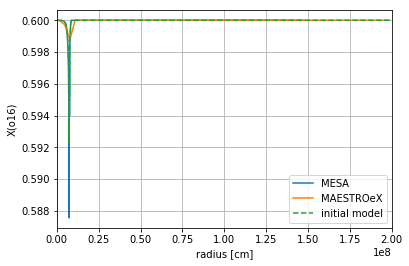

In [12]:
element = 'o16'
y_axis = np.array(a[element])

plt.plot(radius*r_sun, y_axis, label = 'MESA')
plt.plot(to_save['radius'], to_save["X("+element+")"], label = 'MAESTROeX')
plt.plot(df['radius'],df[element],'--', label = 'initial model')
plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
#plt.ylim(1e6,1e13)
plt.xlim(0,2.e8)
plt.grid()
plt.legend()
plt.savefig(name+"_"+element+"_comp.png")

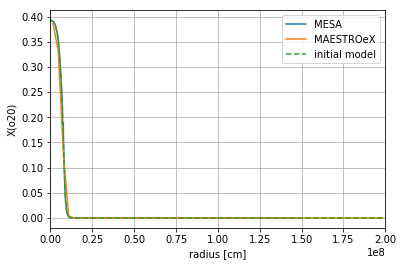

In [13]:
element = 'o20'
y_axis = np.array(a[element])

plt.plot(radius*r_sun, y_axis, label = 'MESA')
plt.plot(to_save['radius'], to_save["X("+element+")"], label = 'MAESTROeX')
plt.plot(df['radius'],df[element],'--', label = 'initial model')
plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
#plt.ylim(1e6,1e13)
plt.xlim(0,2.e8)
plt.grid()
plt.legend()
plt.savefig(name+"_"+element+"_comp.png")

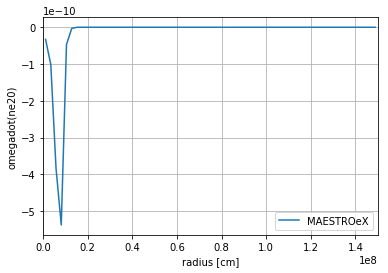

In [14]:
plot = yt.ProfilePlot(my_sphere, "radius", "omegadot(ne20)", weight_field="cell_volume")
plot.set_log('radius', False)
plot.set_xlim(0, 1.5e8)
profile = plot.profiles[0]

r_sun = 6.955e10  # cm
radius = np.array(a["radius"])

plt.plot(profile.x, profile['omegadot(ne20)'],label = 'MAESTROeX')
plt.xlabel("radius [cm]")
plt.ylabel("omegadot(ne20)")
plt.xlim(0,1.5e8)
plt.grid()
plt.legend()
plt.savefig(name+"_ne20_omegadot.png")

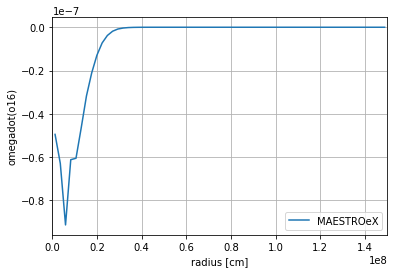

In [12]:
plot = yt.ProfilePlot(my_sphere, "radius", "omegadot(o16)", weight_field="cell_volume")
plot.set_log('radius', False)
plot.set_xlim(0, 1.5e8)
profile = plot.profiles[0]

r_sun = 6.955e10  # cm
radius = np.array(a["radius"])

plt.plot(profile.x, profile['omegadot(o16)'],label = 'MAESTROeX')
plt.xlabel("radius [cm]")
plt.ylabel("omegadot(o16)")
plt.xlim(0,1.5e8)
plt.grid()
plt.legend()
plt.savefig(name+"_o16_omegadot.png")

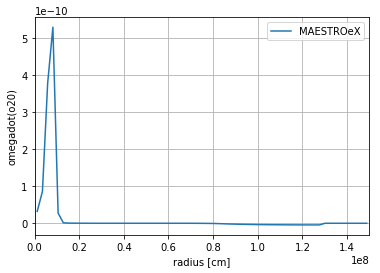

In [13]:
plot = yt.ProfilePlot(my_sphere, "radius", "omegadot(o20)", weight_field="cell_volume")
plot.set_log('radius', False)
plot.set_xlim(0, 1.5e8)
profile = plot.profiles[0]

r_sun = 6.955e10  # cm
radius = np.array(a["radius"])

plt.plot(profile.x, profile['omegadot(o20)'],label = 'MAESTROeX')
plt.xlabel("radius [cm]")
plt.ylabel("omegadot(o20)")
plt.xlim(0,1.5e8)
plt.grid()
plt.legend()
plt.savefig(name+"_o20_omegadot.png")

In [20]:
slc = yt.SlicePlot(ds, 'z', "rho")#,center = [0,0,0])#, width=(5000,'km'))
slc.save(name+"_rho.png")

yt : [INFO     ] 2019-04-24 18:38:05,774 xlim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:05,776 ylim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:05,777 xlim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:05,781 ylim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:05,785 Making a fixed resolution buffer of (('boxlib', 'rho')) 800 by 800
yt : [INFO     ] 2019-04-24 18:38:06,582 Saving plot plt0000001_rho.png


['plt0000001_rho.png']

In [21]:
slc = yt.SlicePlot(ds, 'z', "tfromp")#, width=(3200,'km'))
slc.set_log('tfromp', False)
slc.save(name+"_tfromp.png")

yt : [INFO     ] 2019-04-24 18:38:08,562 xlim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:08,563 ylim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:08,565 xlim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:08,566 ylim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:08,569 Making a fixed resolution buffer of (('boxlib', 'tfromp')) 800 by 800
yt : [INFO     ] 2019-04-24 18:38:09,051 Saving plot plt0000001_tfromp.png


['plt0000001_tfromp.png']

In [22]:
slc = yt.SlicePlot(ds, 'z', "tfromp", width=(300,'km'))
slc.set_log('tfromp', False)
slc.save(name+"_tfromp_zoom.png")

yt : [INFO     ] 2019-04-24 18:38:09,619 xlim = 235000000.000000 265000000.000000
yt : [INFO     ] 2019-04-24 18:38:09,620 ylim = 235000000.000000 265000000.000000
yt : [INFO     ] 2019-04-24 18:38:09,622 xlim = 235000000.000000 265000000.000000
yt : [INFO     ] 2019-04-24 18:38:09,623 ylim = 235000000.000000 265000000.000000
yt : [INFO     ] 2019-04-24 18:38:09,626 Making a fixed resolution buffer of (('boxlib', 'tfromp')) 800 by 800
yt : [INFO     ] 2019-04-24 18:38:10,026 Saving plot plt0000001_tfromp_zoom.png


['plt0000001_tfromp_zoom.png']

In [23]:
slc = yt.SlicePlot(ds, 'z', "Pi")#, width=(3200,'km'))
slc.save(name+"_Pi.png")

yt : [INFO     ] 2019-04-24 18:38:12,145 xlim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:12,147 ylim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:12,149 xlim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:12,151 ylim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:12,155 Making a fixed resolution buffer of (('boxlib', 'Pi')) 800 by 800
yt : [WARNING  ] 2019-04-24 18:38:12,279 Plot image for field ('boxlib', 'Pi') has no positive values.  Max = -160795245884600.125000.
yt : [WARNING  ] 2019-04-24 18:38:12,279 Switching to linear colorbar scaling.
yt : [INFO     ] 2019-04-24 18:38:12,545 Saving plot plt0000001_Pi.png


['plt0000001_Pi.png']

In [24]:
slc = yt.SlicePlot(ds, 'z', "Hnuc")#, width=(5000,'km'),center=(2.5e8,2.5e8,2.5e8))
slc.save(name+"_Hnuc.png")

yt : [INFO     ] 2019-04-24 18:38:14,159 xlim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:14,160 ylim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:14,162 xlim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:14,164 ylim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:14,167 Making a fixed resolution buffer of (('boxlib', 'Hnuc')) 800 by 800
yt : [INFO     ] 2019-04-24 18:38:14,723 Saving plot plt0000001_Hnuc.png


['plt0000001_Hnuc.png']

In [25]:
slc = yt.SlicePlot(ds, 'z', "radius")#, width=(3200,'km'))
slc.set_log('radius', False)
slc.save(name+"_radius.png")

yt : [INFO     ] 2019-04-24 18:38:15,477 xlim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:15,478 ylim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:15,479 xlim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:15,481 ylim = 0.000000 500000000.000000
yt : [INFO     ] 2019-04-24 18:38:15,485 Making a fixed resolution buffer of (('index', 'radius')) 800 by 800
yt : [INFO     ] 2019-04-24 18:38:16,086 Saving plot plt0000001_radius.png


['plt0000001_radius.png']

In [26]:
slc = yt.SlicePlot(ds, 'z', "omegadot(ne20)", width=(1000,'km'))
slc.set_log('omegadot(ne20)', False)
slc.save(name+"_omegadot(ne20).png")

yt : [INFO     ] 2019-04-24 18:38:18,239 xlim = 200000000.000000 300000000.000000
yt : [INFO     ] 2019-04-24 18:38:18,240 ylim = 200000000.000000 300000000.000000
yt : [INFO     ] 2019-04-24 18:38:18,242 xlim = 200000000.000000 300000000.000000
yt : [INFO     ] 2019-04-24 18:38:18,243 ylim = 200000000.000000 300000000.000000
yt : [INFO     ] 2019-04-24 18:38:18,245 Making a fixed resolution buffer of (('boxlib', 'omegadot(ne20)')) 800 by 800
yt : [WARNING  ] 2019-04-24 18:38:18,391 Plot image for field ('boxlib', 'omegadot(ne20)') has both positive and negative values. Min = -0.000001, Max = 0.000000.
yt : [WARNING  ] 2019-04-24 18:38:18,393 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-04-24 18:38:18,791 Saving plot plt0000001_omegadot(ne20).png


['plt0000001_omegadot(ne20).png']

In [27]:
slc = yt.SlicePlot(ds, 'z', "omegadot(o20)", width=(1000,'km'))
slc.set_log('omegadot(o20)', False)
slc.save(name+"_omegadot(o20).png")

yt : [INFO     ] 2019-04-24 18:38:19,934 xlim = 200000000.000000 300000000.000000
yt : [INFO     ] 2019-04-24 18:38:19,935 ylim = 200000000.000000 300000000.000000
yt : [INFO     ] 2019-04-24 18:38:19,938 xlim = 200000000.000000 300000000.000000
yt : [INFO     ] 2019-04-24 18:38:19,941 ylim = 200000000.000000 300000000.000000
yt : [INFO     ] 2019-04-24 18:38:19,943 Making a fixed resolution buffer of (('boxlib', 'omegadot(o20)')) 800 by 800
yt : [WARNING  ] 2019-04-24 18:38:20,077 Plot image for field ('boxlib', 'omegadot(o20)') has both positive and negative values. Min = -0.000000, Max = 0.000000.
yt : [WARNING  ] 2019-04-24 18:38:20,078 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-04-24 18:38:20,415 Saving plot plt0000001_omegadot(o20).png


['plt0000001_omegadot(o20).png']

In [28]:
slc = yt.SlicePlot(ds, 'z', "omegadot(o16)", width=(1000,'km'))
slc.set_log('omegadot(o16)', False)
slc.save(name+"_omegadot(o16).png")

yt : [INFO     ] 2019-04-24 18:38:21,628 xlim = 200000000.000000 300000000.000000
yt : [INFO     ] 2019-04-24 18:38:21,630 ylim = 200000000.000000 300000000.000000
yt : [INFO     ] 2019-04-24 18:38:21,632 xlim = 200000000.000000 300000000.000000
yt : [INFO     ] 2019-04-24 18:38:21,633 ylim = 200000000.000000 300000000.000000
yt : [INFO     ] 2019-04-24 18:38:21,636 Making a fixed resolution buffer of (('boxlib', 'omegadot(o16)')) 800 by 800
yt : [WARNING  ] 2019-04-24 18:38:21,785 Plot image for field ('boxlib', 'omegadot(o16)') has both positive and negative values. Min = -0.000000, Max = 0.000000.
yt : [WARNING  ] 2019-04-24 18:38:21,787 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-04-24 18:38:22,153 Saving plot plt0000001_omegadot(o16).png


['plt0000001_omegadot(o16).png']

In [29]:
to_save.head()

,radius,Hnuc [erg/g/s],h [erg/g],tfromp,p0,rho,X(h1),X(he4),X(o16),X(o20),X(f20),X(ne20),X(mg24),X(al27),X(si28),X(p31),X(s32)
0,1171875.0,5.996968e+10,3.318201e+18,6.753616e+08,7.339735e+27,8.319326e+09,9.896163e-11,6.767372e-15,0.599992,0.389997,2.704791e-09,0.010006,1.175195e-10,8.668112e-11,4.995970e-06,8.310088e-11,1.098132e-10
1,3515625.0,7.083261e+10,3.319842e+18,7.382075e+08,7.230342e+27,8.188654e+09,9.873312e-11,4.052194e-15,0.599956,0.370272,7.404318e-09,0.029744,1.414339e-10,8.389392e-11,2.756156e-05,7.921163e-11,1.107981e-10
2,5859375.0,9.372812e+10,3.356157e+18,8.629453e+08,7.015789e+27,7.855433e+09,9.816014e-11,1.938353e-15,0.598857,0.283351,3.649090e-08,0.117065,2.435516e-10,7.610581e-11,7.262482e-04,7.016649e-11,1.121569e-10
3,8203125.0,7.972904e+10,3.453166e+18,7.984187e+08,6.733141e+27,7.324454e+09,9.851828e-11,3.198879e-15,0.598594,0.089990,5.586428e-08,0.310504,3.680630e-10,8.051994e-11,9.120441e-04,7.607417e-11,1.099343e-10
4,10546875.0,3.239139e+11,3.461040e+18,4.012615e+08,6.407529e+27,6.952497e+09,9.981321e-11,3.356759e-11,0.600000,0.004863,3.537043e-09,0.395137,4.331261e-10,9.750971e-11,1.181562e-10,9.706862e-11,1.024016e-10


In [30]:
to_save.to_csv('/Users/sailor/Desktop/asro_work/test/csv_result/'+name+".csv",index = False)